# EDA of Netflix Data on Python

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading our dataset
df = pd.read_csv('C:\\Users\\ARITRA\Downloads\\netflix_titles.csv')
df.head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


In [3]:
df.shape # tells us the rows and columns of the dataset

(5850, 15)

In [4]:
df.describe() # tells us some basic statistics about or columns

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [5]:
df.info() # shows the count and datatypes of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

## Missing Values

In [6]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [7]:
#convert integer to float
df['runtime'] = df['runtime'].astype(float)

In [8]:
df.head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51.0,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114.0,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109.0,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91.0,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150.0,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94.0,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102.0,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110.0,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104.0,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


## Handling Missing Values

In [9]:
# Filling the nan values.
df.fillna({'title':'unavailable', 'description':'unavailable', 'age_certification':'All_Age', 'seasons':'unavailable', 'imdb_id':'unavailable', 'imdb_score':'unavailable', 'imdb_votes':'unavailable', 'tmdb_popularity':'unavailable', 'tmdb_score':'unavailable'}, inplace = True)
df.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [10]:
df[df.release_year == 1980].head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104.0,"['romance', 'action', 'drama']",['US'],unavailable,tt0080453,5.8,69844.0,50.324,6.156
19,tm94651,Dostana,MOVIE,Two close friends decide to enter law enforcem...,1980,All_Age,161.0,"['drama', 'comedy', 'crime', 'romance', 'action']",['IN'],unavailable,tt0080653,2.1,25.0,3.98,4.9
32,tm259684,Whispers,MOVIE,"At every station, between sites filled with po...",1980,All_Age,93.0,['documentation'],"['CA', 'FR', 'LB']",unavailable,tt0170803,7.8,78.0,0.6,5.0


 ### VISUALIZATIONS

In [11]:
df.type.value_counts() #value_counts shows the count of different categories in a given column

type
MOVIE    3744
SHOW     2106
Name: count, dtype: int64

Text(0.5, 1.0, 'Count vs Type of Shows')

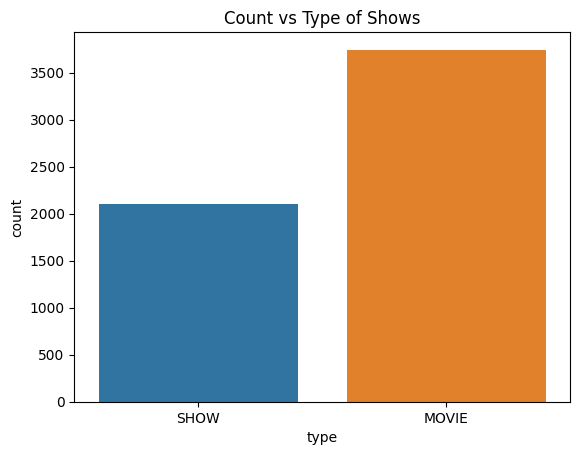

In [12]:
sns.countplot(x = 'type', data = df) #countplot helps us to plot counts of each category
plt.title('Count vs Type of Shows')

Its's clearly visible that there are more movies compared to shows in Netflix

#### Country Analysis

In [13]:
df['production_countries'].value_counts().head(20)

production_countries
['US']    1959
['IN']     599
['JP']     264
[]         229
['KR']     222
['GB']     218
['ES']     161
['FR']     125
['CA']     107
['MX']      98
['BR']      90
['TR']      83
['PH']      80
['DE']      68
['NG']      64
['AU']      62
['ID']      61
['CN']      59
['TW']      59
['IT']      56
Name: count, dtype: int64

Text(0.5, 1.0, 'Countrywise Content on Netflix')

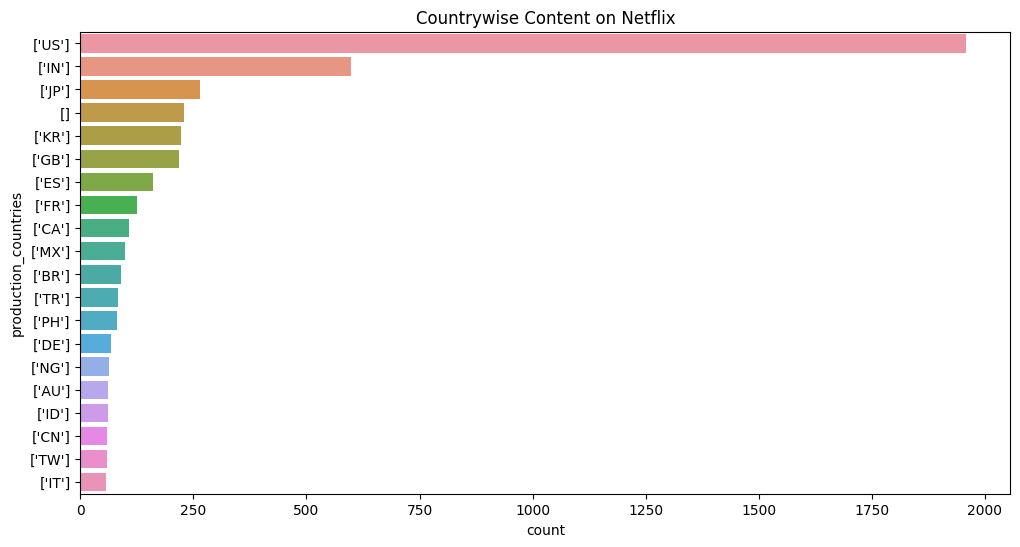

In [14]:
plt.figure(figsize = (12, 6))
sns.countplot(y ='production_countries', order = df['production_countries'].value_counts().index[:20], data = df)
plt.title('Countrywise Content on Netflix')

Text(0.5, 1.0, 'Scores of netflix shows vs counts')

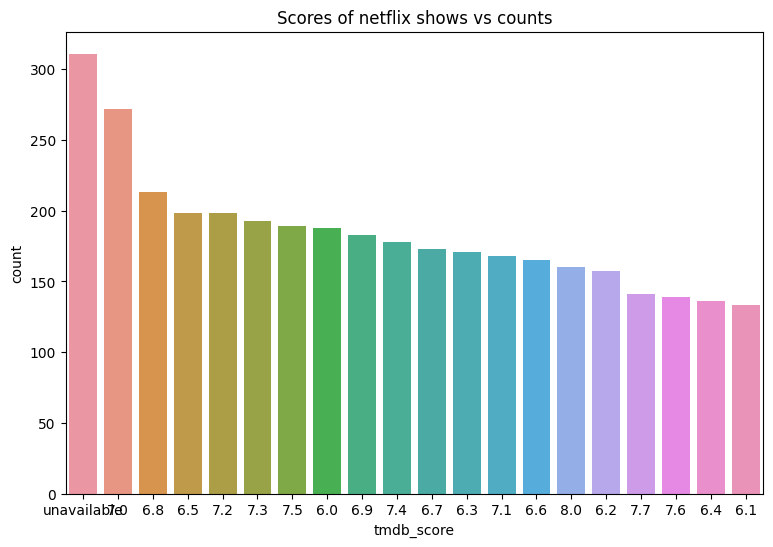

In [15]:
plt.figure(figsize = (9,6))
sns.countplot(x = 'tmdb_score', order = df['tmdb_score'].value_counts().index[:20], data = df)
plt.title('Scores of netflix shows vs counts')

In [16]:
df.release_year.value_counts()[:20]

release_year
2019    836
2020    814
2021    787
2018    773
2017    563
2022    371
2016    362
2015    223
2014    153
2013    135
2012    107
2011     86
2010     66
2008     63
2009     59
2007     48
2006     45
2004     38
2005     32
2003     31
Name: count, dtype: int64

Text(0.5, 1.0, 'Content released in years on netflix')

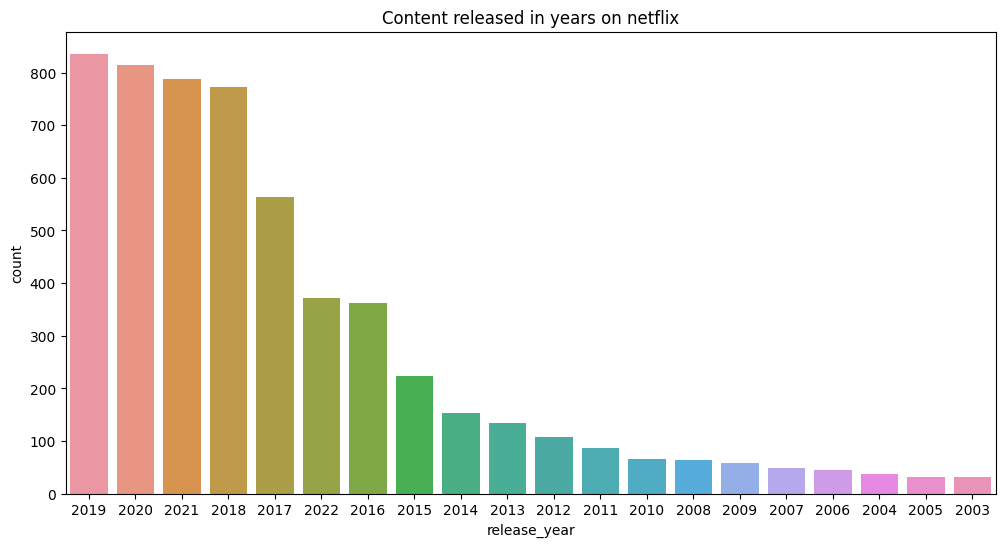

In [17]:
# Highest number of contents released in each year
plt.figure(figsize = (12,6)) 
sns.countplot(x= 'release_year', order = df['release_year'].value_counts().index[0:20], data = df)
plt.title('Content released in years on netflix')

Text(0.5, 1.0, 'Age certification of the contents')

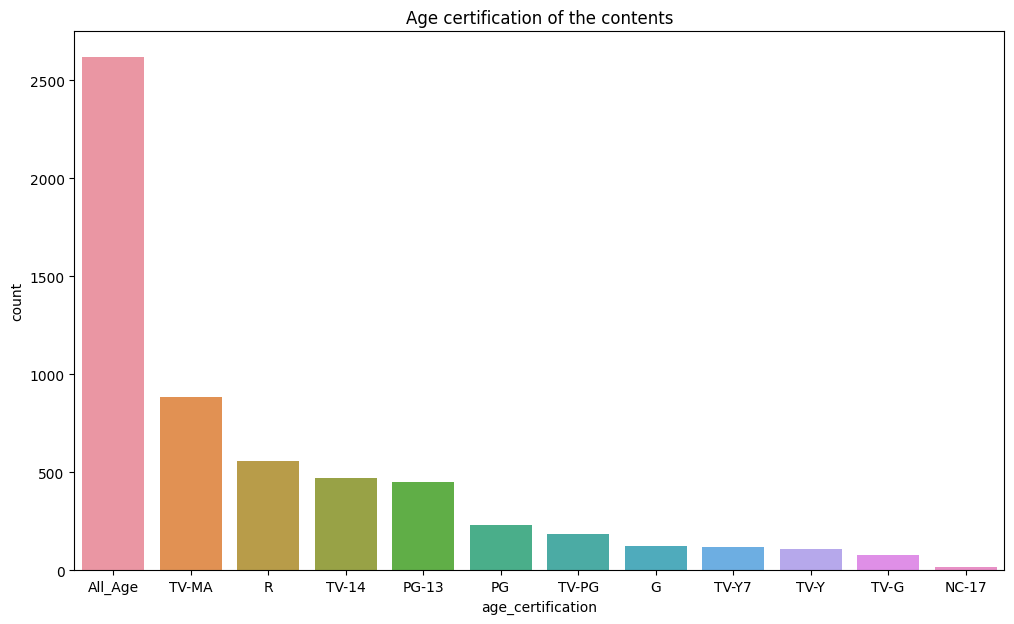

In [18]:
# Visualization of the Age certification of the contents
plt.figure(figsize = (12,7))
sns.countplot(x = 'age_certification', order = df['age_certification'].value_counts().index[0:20], data = df)
plt.title('Age certification of the contents')

### Popular genres of Netflix shows

Text(0.5, 1.0, 'Top 20 Genres of Netflix shows')

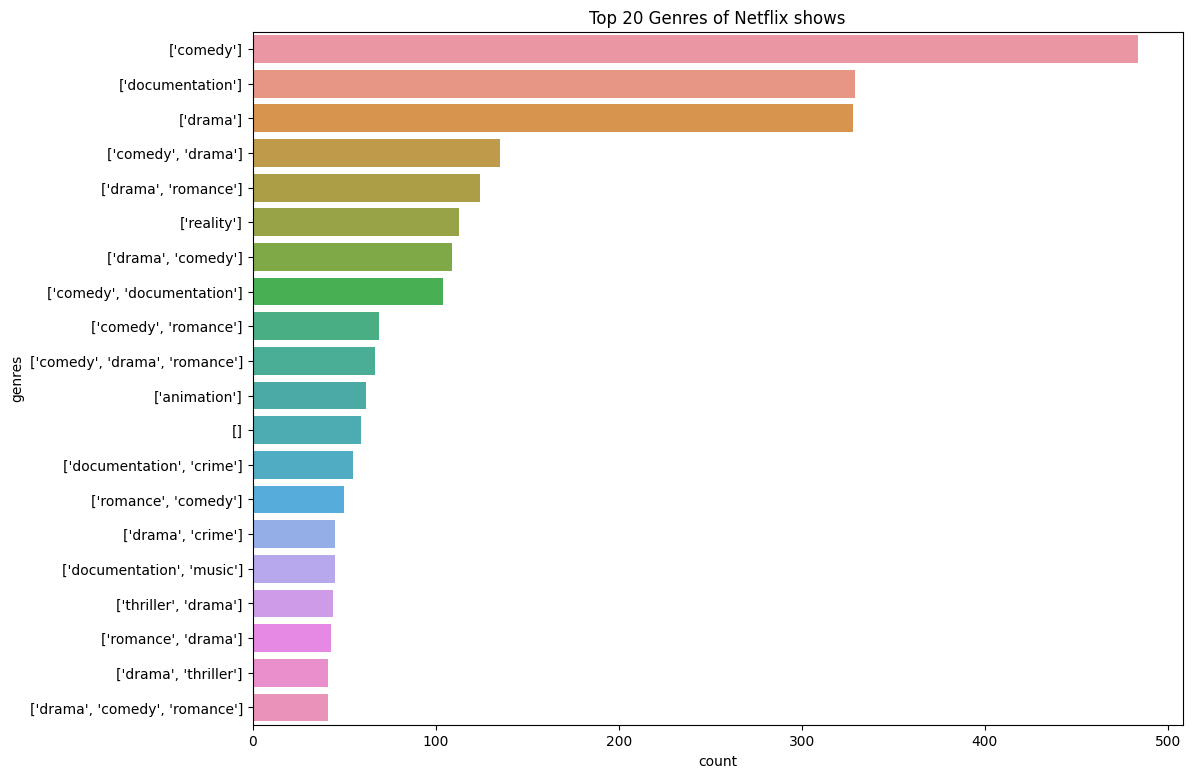

In [19]:
plt.figure(figsize = (12,9))
sns.countplot(y = 'genres', order = df['genres'].value_counts().index[0:20], data = df)
plt.title('Top 20 Genres of Netflix shows')

## Summary

We have performed some operstions to find out some very useful information. The important findings from the analysis are listed below
 1. Netflix has more movies than shows
 2. Most number of Netflix contents were released by US followed by India and Japan.
 3. Most of contents are for people of all age group, followed by Mature Audiences.
 4. 2019 has the maximum number of contents released by Netflix.
 5. Comedy is the most popular genre in Netflix.